## 이상치제거하는 나만의 근거
 
나만의 근거라기 보다는 z-score 를 사용,

z-score가 단점은 있지만 사용이 편하고 익숙함

(이상치를 제거하지않으면, 다음 단계로 데이터를 정규화시킬때, Minmax scaler 사용시 데이터의 분포가 과도하게 한곳으로 쏠림) 




In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('trade.csv')
print("df.head()",df.head())
print("df.tail()",df.tail())
print("shape",df.shape)

df.head()           기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지  기타사항
0  2015년 01월  중국  116932.0  12083947.0  334522.0  8143271.0  3940676.0   NaN
1  2015년 01월  미국   65888.0   5561545.0  509564.0  3625062.0  1936484.0   NaN
2  2015년 01월  일본   54017.0   2251307.0   82480.0  3827247.0 -1575940.0   NaN
3  2015년 02월  중국   86228.0   9927642.0  209100.0  6980874.0  2946768.0   NaN
4  2015년 02월  미국   60225.0   5021264.0  428678.0  2998216.0  2023048.0   NaN
df.tail()             기간 국가명      수출건수       수출금액       수입건수       수입금액       무역수지  기타사항
194  2020년 05월  미국  126598.0  4600726.0  1157163.0  4286873.0   313853.0   NaN
195  2020년 05월  일본  166568.0  1798128.0   133763.0  3102734.0 -1304606.0   NaN
196  2020년 06월  중국       NaN        NaN        NaN        NaN        NaN   NaN
197  2020년 06월  미국       NaN        NaN        NaN        NaN        NaN   NaN
198  2020년 06월  일본       NaN        NaN        NaN        NaN        NaN   NaN
shape (199, 8)


In [7]:
df.isnull().sum()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [8]:
df.drop('기타사항', axis=1, inplace = True)

In [9]:
df.fillna(method='ffill',inplace=True)

In [10]:
df.info

<bound method DataFrame.info of             기간 국가명      수출건수        수출금액       수입건수       수입금액       무역수지
0    2015년 01월  중국  116932.0  12083947.0   334522.0  8143271.0  3940676.0
1    2015년 01월  미국   65888.0   5561545.0   509564.0  3625062.0  1936484.0
2    2015년 01월  일본   54017.0   2251307.0    82480.0  3827247.0 -1575940.0
3    2015년 02월  중국   86228.0   9927642.0   209100.0  6980874.0  2946768.0
4    2015년 02월  미국   60225.0   5021264.0   428678.0  2998216.0  2023048.0
..         ...  ..       ...         ...        ...        ...        ...
194  2020년 05월  미국  126598.0   4600726.0  1157163.0  4286873.0   313853.0
195  2020년 05월  일본  166568.0   1798128.0   133763.0  3102734.0 -1304606.0
196  2020년 06월  중국  166568.0   1798128.0   133763.0  3102734.0 -1304606.0
197  2020년 06월  미국  166568.0   1798128.0   133763.0  3102734.0 -1304606.0
198  2020년 06월  일본  166568.0   1798128.0   133763.0  3102734.0 -1304606.0

[199 rows x 7 columns]>

In [11]:
df.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,199.000000,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02
mean,118888.527638,6.529971e+06,3.803196e+05,5.543306e+06,9.636449e+05
std,74916.978868,3.970963e+06,3.022996e+05,2.026540e+06,2.337355e+06
min,48652.000000,1.696097e+06,8.087200e+04,2.998216e+06,-2.761657e+06
25%,73496.000000,2.430858e+06,1.486085e+05,3.935458e+06,-1.604578e+06
50%,86069.000000,5.932556e+06,2.790230e+05,4.703319e+06,1.296969e+06
75%,158741.000000,1.065558e+07,5.017450e+05,7.337596e+06,2.709528e+06
max,528240.000000,1.476704e+07,1.368345e+06,1.033882e+07,6.700639e+06


In [12]:
# 이상티제거전 사본
import copy
df_before = copy.deepcopy(df)

In [13]:
# outlier함수 : z score
def outlier(data,col,z):
    return df[abs(df[col] - df[col].mean()) / df[col].std() > z].index

otl2= outlier(df, '무역수지', 2)
print("이상치 >>> z == 2 : ", otl2)

이상치 >>> z == 2 :  Int64Index([129, 132], dtype='int64')


In [14]:
otl25= outlier(df, '무역수지', 2.5)
print("이상치 >>> z == 2.5 : ", otl25)


이상치 >>> z == 2.5 :  Int64Index([], dtype='int64')


In [23]:
otl15= outlier(df, '무역수지', 1.5)
print("이상치 >>> z == 1.5 : ", otl15)

이상치 >>> z == 1.5 :  Int64Index([14, 32, 38, 158, 176, 182, 195, 196, 197, 198], dtype='int64')


In [21]:
df = df.drop(otl10,axis=0, inplace=False)

<AxesSubplot:>

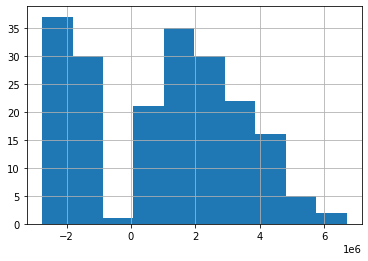

In [19]:
# hist 비교: 이전
df_before['무역수지'].hist()

<AxesSubplot:>

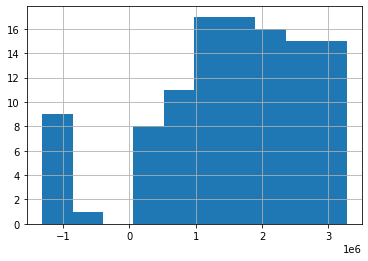

In [24]:
# hist 비교: 이후
df['무역수지'].hist()

In [27]:
# outlier함수 : IQR

def outlier_iqr(data, col, q):
    print(f"data[col]",data[col].head())
    q1, q3 = np.percentile(data[col],[25,75])
    print(q1,q3)
    IQR = q3 -q1
    print("IQR",IQR)
    return data[(q1 - q*IQR > data[col]) | (q3 + q*IQR < data[col])].index

otlq05= outlier_iqr(df, '무역수지', 0.5)
print("이상치 >>>  ", otlq05)

data[col] 1     1936484.0
3     2946768.0
4     2023048.0
7     2739490.0
10    2362628.0
Name: 무역수지, dtype: float64
931891.0 2512757.0
IQR 1580866.0
이상치 >>>   Int64Index([14, 32, 38, 158, 176, 182, 195, 196, 197, 198], dtype='int64')


In [34]:
df_iqr = copy.deepcopy(df_before)
df_iqr = df_iqr.drop(otlq05, axis=0, inplace = False)

<AxesSubplot:>

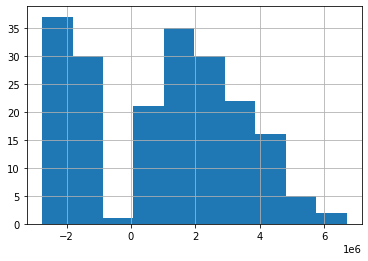

In [36]:
# hist 비교: 이전
df_before['무역수지'].hist()

<AxesSubplot:>

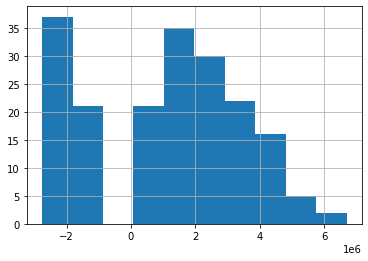

In [35]:
# hist 비교: 이후
df_iqr['무역수지'].hist()